I will simply start with importing all the packages we need for this task:

In [ ]:
import numpy as np  
import pandas as pd  
from sklearn.metrics.pairwise import cosine_similarity  
import matplotlib.pyplot as plt  
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator  
from nltk.corpus import stopwords  
import string  
data = pd.read_csv("Myntra kurtis.csv")  
print(data.head())  

       Brand Name  \
0  Rain & Rainbow   
1        HERE&NOW   
2           Anouk   
3       Anubhutee   
4           GERUA   

                                                                                                              Product URL  \
0   https://www.myntra.com/kurtis/rain--rainbow/rain--rainbow-rust--mustard-yellow-printed-pure-cotton-kurti/19791536/buy   
1              https://www.myntra.com/kurtis/herenow/herenow-women-blue-embroidered-pure-cotton-a-line-kurti/12037942/buy   
2  https://www.myntra.com/kurtis/anouk/anouk-women-off-white--blue-printed-pure-cotton-indigo-anarkali-kurta/10960690/buy   
3                         https://www.myntra.com/kurtis/anubhutee/anubhutee-pink-ethnic-motifs-printed-kurti/17413232/buy   
4            https://www.myntra.com/kurtis/gerua/gerua-women-black--pink-ethnic-motifs-printed-pleated-kurti/18122558/buy   

                                                                                                                          

In [ ]:
 print(data.tail())  

        Brand Name  \
594       FAWOMENT   
595       Fabindia   
596  all about you   
597        MALHAAR   
598         Pistaa   

                                                                                                                                            Product URL  \
594                                                https://www.myntra.com/kurtis/fawoment/fawoment-red-floral-embroidered-chikankari-kurti/20833226/buy   
595                                                          https://www.myntra.com/kurtis/fabindia/fabindia-pink-yoke-design-v-neck-kurti/15816496/buy   
596  https://www.myntra.com/kurtis/all-about-you/all-about-you-ethnic-motifs-yoke-design-tie-up-neck-bell-sleeves-thread-work-a-line-kurti/16319814/buy   
597                                                                   https://www.myntra.com/kurtis/malhaar/malhaar-blue-pure-cotton-kurti/19744108/buy   
598                                                                   https://www.myntra.com

In [ ]:
print(data.describe())  

       Product Ratings  Number of ratings  Selling Price        Price
count       401.000000         599.000000     525.000000   525.000000
mean          4.191771          79.262104     779.695238  1865.729524
std           0.379549         232.759927     530.983362   772.987426
min           1.500000           0.000000     274.000000   400.000000
25%           4.000000           0.000000     539.000000  1499.000000
50%           4.200000          11.000000     659.000000  1739.000000
75%           4.400000          42.000000     809.000000  1999.000000
max           5.000000        2800.000000    4720.000000  5900.000000


In [ ]:
print(data.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand Name         599 non-null    object 
 1   Product URL        599 non-null    object 
 2   Image              132 non-null    object 
 3   Product Ratings    401 non-null    float64
 4   Number of ratings  599 non-null    int64  
 5   Product Info       599 non-null    object 
 6   Selling Price      525 non-null    float64
 7   Price              525 non-null    float64
 8   Discount           525 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 42.2+ KB
None


Checking to see if the dataset contains any null values:

In [ ]:
print(data.isnull().sum())  

Brand Name             0
Product URL            0
Image                467
Product Ratings      198
Number of ratings      0
Product Info           0
Selling Price         74
Price                 74
Discount              74
dtype: int64


The dataset has some null values. However, the Image column contains 467 null entries and has 600 rows. I'll thus remove the Image column before continuing:1

In [ ]:
data = data.drop("Image",axis=1)  

Let's remove the null values from the remaining columns in the dataset now:1

In [ ]:
data = data.dropna()  

Let's now examine how the dataset is structured:1

In [ ]:
print(data.shape)  

(364, 8)


After the null values are removed, the dataset contains 364 rows. Next, let's examine the companies that sell more Kurtis on Myntra:1

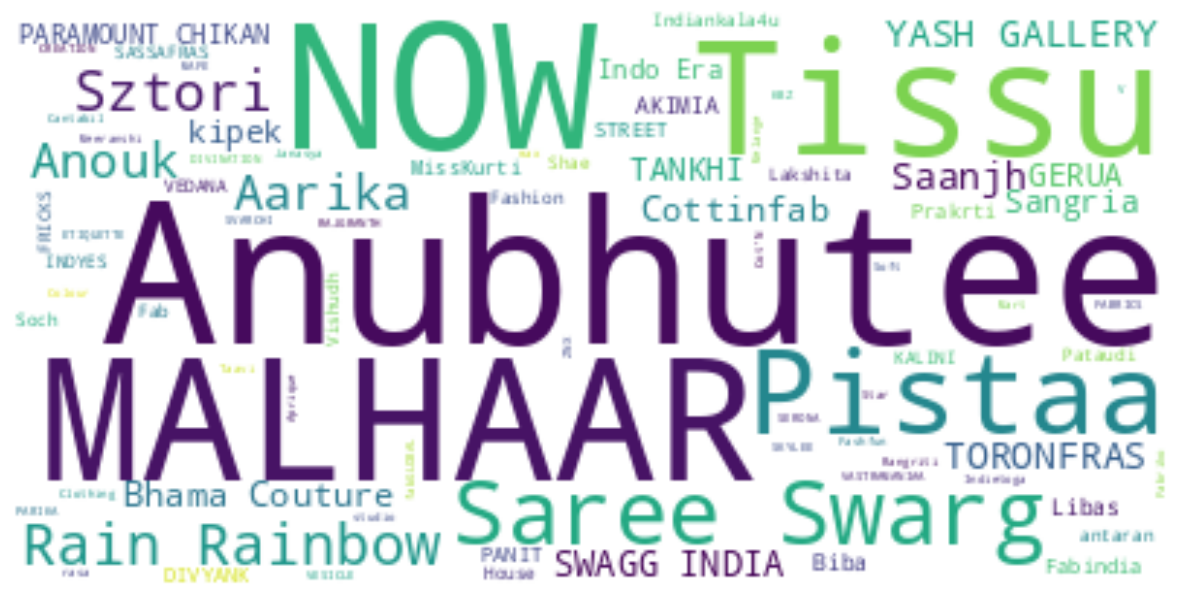

In [ ]:
text = " ".join(i for i in data["Brand Name"])  
stopwords = set(STOPWORDS)  
wordcloud = WordCloud(stopwords=stopwords,   
                      background_color="white").generate(text)  
plt.figure( figsize=(15,10))  
plt.imshow(wordcloud, interpolation='bilinear')  
plt.axis("off")  
plt.show()  

Kurtis on Myntra is, therefore, frequently purchased from companies like Anubhutee, Now, Tissu, MALHARS, and Pistaas. Let's now examine the Kurtis with the greatest ratings on Myntra:

In [ ]:
highest_rated = data.sort_values(by=["Product Ratings"],   
                                 ascending=False)  
highest_rated = highest_rated.head(10)  
print(highest_rated[['Product Info', "Product Ratings", "Brand Name"]])  

                        Product Info  Product Ratings        Brand Name
435            Mandarin Collar Kurti              5.0            INDYES
249      Floral Printed Kaftan Kurta              5.0           Sangria
448          Solid Pure Cotton Kurti              5.0           MALHAAR
308             Floral Printed Kurti              5.0           MALHAAR
538                Pure Cotton Kurti              5.0           MALHAAR
277    Women Solid Embellished Kurti              5.0          Fabindia
515     Chikankari Embroidered Kurti              5.0  PARAMOUNT CHIKAN
62       Ethnic Motifs Printed Kurti              4.9              Biba
80   Ethnic Motifs Embroidered Kurti              4.8           Sangria
450      Self Striped Straight Kurti              4.8            Saanjh


The top-rated Kurtis on Myntra is sold by companies like Indies, Sangria, Paramount Chikan, MALHARS, Biba, Fabindia, and Saanjh.

Recommending Fashion Products

We may compute the rolling sum of all the evaluations and suggest products based on the calculated average ratings to recommend the current fashion. To get the weighted score of all of Kurtis' ratings, we need the following:

mean rating (Mr): the average score assigned to each product
minimal ratings (m): minimal quantity of ratings
Overall number of ratings (n): The item's overall number of ratings
average ratings (a): the product's average rating
The formula for determining the relative weights of the product ratings is shown below:

score = (n1/(n1+m1) * a1) + (m1/(m1+n1) * m1r) 

Let's now get the weighted score and list the Myntra Kurtis that are now trending the most:



In [ ]:
m1r = data['Product Ratings'].mean()  
m1 = data['Number of ratings'].quantile(0.9)  
n1 = data['Number of ratings']  
a1 = data['Product Ratings']  
data["Score"]  = (n1/(n1+m1) * a1) + (m1/(m1+n1) * m1r)  
Recommendations = data.sort_values('Score', ascending=False)  
print(Recommendations[['Brand Name', 'Product Info',  
                       'Product Ratings', 'Score',   
                       'Selling Cost', 'Discount']].head(10))  

KeyError: ignored